In [264]:
import random
import numpy as np
import networkx as nx 
from dijkstar import Graph, find_path

In [265]:
def generate_instance_matrix(nb_vertex, min_weight, max_weight, density):
  graph = np.ones((nb_vertex, nb_vertex)) * np.inf
  for i in range(nb_vertex - 1):
    for j in range(i+1, nb_vertex):
      if random.uniform(0, 1) < density:
        weight = random.randint(min_weight, max_weight)
        graph[i, j] = weight
        graph[j, i] = weight
  for i,line in enumerate(graph):
    index_zeros = np.where(line == np.inf)[0]
    index_zeros = np.delete(index_zeros, np.where(index_zeros == i))
    for j in range(len(index_zeros) - (nb_vertex - 3)):
      index = random.choice(index_zeros)
      index_zeros = np.delete(index_zeros, np.where(index_zeros == index))
      weight = random.randint(min_weight, max_weight)
      graph[i, index] = weight
      graph[index, i] = weight
  return graph

def convert_graph(graph):
  graph_dijkstra = Graph()
  for i in range(len(graph)):
    for j in range(len(graph)):
      graph_dijkstra.add_edge(i, j,graph[i][j])
  return graph_dijkstra

def get_distance_between_nodes(graph, i, j):
  if (graph[i][j] != np.inf):
    return graph[i][j], [i, j]
  else:
    if i != j:
      shortest_path = find_path(graph, i,j)
      return shortest_path.total_cost, shortest_path.nodes
    else:
      return 0, None

def get_complete_graph(graph, node_list):
  all_paths = {}
  converted_graph = convert_graph(graph)
  complete_graph = np.zeros((len(node_list), len(node_list)))
  for i in node_list:
    voisins_array = np.delete(node_list, np.where(node_list == i))
    for j in voisins_array:
      distance, path = get_distance_between_nodes(converted_graph, i, j)
      converted_graph_i = np.where(node_list == i)[0][0]
      converted_graph_j = np.where(node_list == j)[0][0]
      complete_graph[converted_graph_i][converted_graph_j] = distance
      all_paths[(converted_graph_i, converted_graph_j)] = path
  return complete_graph, all_paths

def get_random_vertex(size, nb_vertex):
  random_vertex = []
  all_vertex = np.array(range(size))
  for _ in range(nb_vertex):
    value = random.choice(all_vertex)
    random_vertex.append(value)
    all_vertex = np.delete(all_vertex, np.where(all_vertex == value))
  return np.array(random_vertex)

def generate_interval():
  interval = random.choice(range(1,4))
  shift = random.choice(range(0, 11-interval))
  return(shift*60, (shift+interval)*60)

def generate_instance(nb_vertex_matrix, min_weight, max_weight, density, random_vertex):
  graph = generate_instance_matrix(nb_vertex_matrix, min_weight, max_weight, density)
  complete_graph, all_paths = get_complete_graph(graph, random_vertex)
  return graph, complete_graph, all_paths

def get_complete_path(path, all_paths):
  complete_path = []
  for i in range(len(path) - 1):
    complete_path.extend(all_paths[(path[i], path[i+1])][:-1])
    if i == len(path) - 2:
      complete_path.append(all_paths[(path[i], path[i+1])][-1])
  return complete_path

def is_path_in_interval(path, complete_graph, interval, vertex):
  weight = 0
  for i in range(np.where(np.array(path) == vertex)[0][0]):
    weight += complete_graph[path[i]][path[i+1]]
  if weight >= interval[0] and weight <= interval[1]:
    return True
  else:
    return False

def generate_neighbours(path, complete_graph, interval, vertex):
  neighbours = []
  for i in range(len(path)):
    for j in range(i + 1, len(path)-1):
      new_neighbour = path.copy()

      new_neighbour[i] = path[j]
      new_neighbour[j] = path[i]
      
      if is_path_in_interval(new_neighbour, complete_graph, interval, vertex) and new_neighbour[0] == new_neighbour[-1]:
        neighbours.append(new_neighbour)
  return neighbours

def generate_random_path(nb_vertex, start_vertex):
  path = np.arange(nb_vertex)
  path = np.delete(path, np.where(path == start_vertex))
  np.random.shuffle(path)
  path = np.append(path, start_vertex)
  path = np.insert(path, 0, start_vertex)
  return path

In [266]:
# variables
nb_vertex_matrix = 150
min_weight = 10
max_weight = 60
density = 0.3
nb_vertex_chosen = 100

In [267]:
#random generation of a list of vertex among all the vertex available
random_vertex = get_random_vertex(nb_vertex_matrix, nb_vertex_chosen)

# generation of the graph, the complete graph and the list of all paths
graph, complete_graph, all_paths =\
generate_instance(
  nb_vertex_matrix = nb_vertex_matrix,
  min_weight = min_weight,
  max_weight = max_weight,
  random_vertex = random_vertex,
  density = density
)

In [268]:
#generate an interval instance
interval = generate_interval()

In [269]:
#generate a random path
path = generate_random_path(nb_vertex_chosen,0)

In [270]:
# generate the neighbours of a path
neighbours = generate_neighbours(path, complete_graph, (0,50), 0)

In [271]:
# print("graph")
# print(graph)
print("complete_graph")
print(complete_graph)
# print("all_paths")
# print(all_paths)
# print("random_vertex")
# print(random_vertex)
# print("interval")
# print(interval)

complete_graph
[[ 0. 38. 39. ... 33. 29. 34.]
 [38.  0. 43. ... 34. 50. 22.]
 [39. 43.  0. ... 42. 32. 33.]
 ...
 [33. 34. 42. ...  0. 19. 44.]
 [29. 50. 32. ... 19.  0. 45.]
 [34. 22. 33. ... 44. 45.  0.]]


In [272]:
complete_path = get_complete_path(path, all_paths)

In [273]:
print(random_vertex)
print(path)
print(complete_path)
print(neighbours)


[ 41  42 109  44 105  87 126 138  53  67 147  74  78  35  24  28  61 148
 131 112 116  39  36  98  54  76  97  64 101  80 121  51   4  15  12   3
  34  25  48  26  57  17 114   5  30  95  21 108 134 106  52 136 144  38
  62  71 137 118  58  32  22 122 143 125  18 130 133  37  49 139 129 132
  86  68  10 135  56  13  33 127   7  14 120  55  91  45 145  89   8  84
  31  92  69 107   9  73 115  60  99 110]
[ 0 81 78 74 57 32  9 26 93 85 86 13 46 62 45 30 90 15 35 55 61 41 92 76
 21 33 53 77 94 89 44  6 29 50 96 83 22 25 91 72 97 66 51 80  4 38 31 14
 84 70 69 24 88 17 95  8 82  1 56 20 79 16 64 27 99 73 43  3 28  7 12 54
 11 40 68 34 23  5 98  2 52 75 87 71 49 19 37 36 60 48 42 10 39 63 67 65
 18 58 47 59  0]
[41, 14, 55, 33, 10, 75, 118, 124, 4, 8, 89, 67, 97, 46, 107, 100, 45, 145, 93, 71, 35, 21, 63, 143, 91, 95, 121, 123, 31, 44, 28, 3, 71, 101, 122, 17, 69, 56, 109, 39, 15, 87, 126, 38, 13, 82, 9, 138, 84, 30, 126, 37, 80, 132, 52, 118, 115, 55, 66, 36, 126, 76, 114, 92, 6, 133, 86, 

In [274]:
from pulp import *
import numpy as np


X=[]
P = []
X_dict = {}
True_tab = []



# variables du problème
for i in range(len(complete_graph)):
    for j in range(len(complete_graph)):
        X.append(LpVariable("X_" + str(i) + "_" + str(j), 0, 1, LpInteger))
        X_dict[("X_" + str(i) + "_" + str(j))] = LpVariable("X_" + str(i) + "_" + str(j), 0, 1, LpInteger)
        P.append(complete_graph[i][j])

# probleme
prob = LpProblem("plus court chemin", LpMinimize)

# objectif
# Somme de la multiplication des poids de chaque arc
prob += lpSum([P[i] * X[i] for i in range(len(P))])

# contraintes
# La somme d'un arc doit etre egale a 1
X_np = np.array(X)
X_np_reshape = X_np.reshape(len(complete_graph), len(complete_graph))

for i in range(len(X_np_reshape)):
    prob += lpSum(X_np_reshape[i]) == 1
    prob += X_np_reshape[i][i] == 0
    for j in range(len(X_np_reshape)):
        if i != j:
            prob += X_np_reshape[i][j] + X_np_reshape[j][i] <= 1


prob.solve()
print(LpStatus[prob.status])
print("Min=", value(prob.objective))

# variables resultat
for v in prob.variables():
    print("%s=%.2f"%(v.name,v.varValue), end=', ')


c:\Users\adrie\Desktop\adrien\perso\Algo_Avance\Algo_avance\env\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Optimal
Min= 1190.0
X_0_0=0.00, X_0_1=0.00, X_0_10=0.00, X_0_11=0.00, X_0_12=0.00, X_0_13=0.00, X_0_14=0.00, X_0_15=0.00, X_0_16=0.00, X_0_17=0.00, X_0_18=0.00, X_0_19=0.00, X_0_2=0.00, X_0_20=0.00, X_0_21=0.00, X_0_22=0.00, X_0_23=0.00, X_0_24=0.00, X_0_25=0.00, X_0_26=0.00, X_0_27=0.00, X_0_28=0.00, X_0_29=0.00, X_0_3=0.00, X_0_30=0.00, X_0_31=0.00, X_0_32=0.00, X_0_33=0.00, X_0_34=0.00, X_0_35=0.00, X_0_36=0.00, X_0_37=0.00, X_0_38=0.00, X_0_39=0.00, X_0_4=0.00, X_0_40=0.00, X_0_41=0.00, X_0_42=0.00, X_0_43=0.00, X_0_44=0.00, X_0_45=0.00, X_0_46=0.00, X_0_47=0.00, X_0_48=0.00, X_0_49=0.00, X_0_5=0.00, X_0_50=0.00, X_0_51=0.00, X_0_52=0.00, X_0_53=0.00, X_0_54=0.00, X_0_55=0.00, X_0_56=0.00, X_0_57=0.00, X_0_58=0.00, X_0_59=0.00, X_0_6=0.00, X_0_60=0.00, X_0_61=0.00, X_0_62=0.00, X_0_63=0.00, X_0_64=0.00, X_0_65=0.00, X_0_66=0.00, X_0_67=0.00, X_0_68=0.00, X_0_69=0.00, X_0_7=0.00, X_0_70=0.00, X_0_71=0.00, X_0_72=0.00, X_0_73=0.00, X_0_74=1.00, X_0_75=0.00, X_0_76=0.00, X_0_77=0.00, 

In [282]:
nb_iterations=1000 #Dans la boucle while de la boucle principale
T0 = 300 #Température de départ
Tmin = 1e-2 #Température minimale
tau = 1e4 #Pour la loi de refroidissement


In [283]:
def distance_tot(matrice,path_matrix):
    distance_tot = 0
    ind = 2
    points = [0,0]
    for i in range(len(path_matrix)):
        if i == 0:
            points = path_matrix[0:2]
            distance_tot += get_distance_between_nodes(matrice,points[0],points[1])[0]
        else:
            if (ind <= len(matrice)):
                points = path_matrix[ind-1:ind+1]
                distance_tot += get_distance_between_nodes(matrice,points[0],points[1])[0]
                ind += 1
    return distance_tot

print(distance_tot(complete_graph,path))


3369.0


In [284]:
from ipywidgets import IntProgress 
from IPython.display import display

def recuit_simule_matrix(matrix,path):
    bar = IntProgress(min=0, max=nb_iterations, layout={"width" : "100%"})
    display(bar)
    i_tab = []
    T_Tab = []
    distance_tab = []

    distance = distance_tot(matrix,path)
    solution = np.copy(path)
    i = 0
    T=T0

    while T>Tmin and i<nb_iterations:
        i_tab.append(i)
        T_Tab.append(T)
        distance_tab.append(distance)
        i+=1

        #Loi de refroidissement
        T = T0 * np.exp(-i/tau)

        solution_voisine = neighbours[np.random.randint(0, len(neighbours))]
        
        while is_path_in_interval(solution_voisine, matrix, interval, 40) == False:
            solution_voisine = neighbours[np.random.randint(0, len(neighbours))]

        #Création de la nouvelle solution proche de la precedente
        

        #Comparaison des deux valeurs
        difference = distance_tot(matrix,solution) - distance_tot(matrix,solution_voisine)

        # Si la nouvelle solution est meilleure, on la prend
        if difference > 0:
            solution = solution_voisine
            distance = distance_tot(matrix,solution_voisine)
        
        # Sinon, on prend la solution actuelle
        else:
            if np.random.uniform() > np.exp(-difference/T): #on accepte la solution avec une certaine probabilité. 
                solution=solution_voisine
                distance=distance_tot(matrix,solution_voisine)
        
        print(i,T,distance)
        bar.value += 1
    bar.close()
    return solution,distance,i_tab,T_Tab,distance_tab
    
solution, distance, i_tab, T_tab, distance_tab = recuit_simule_matrix(complete_graph,path)


IntProgress(value=0, layout=Layout(width='100%'), max=1000)

1 299.97000149995 3366.0
2 299.94000599960003 3366.0
3 299.91001349865013 3366.0
4 299.88002399680033 3366.0
5 299.8500374937508 3366.0
6 299.82005398920165 3366.0
7 299.790073482853 3345.0
8 299.7600959744051 3345.0
9 299.7301214635582 3345.0
10 299.70014995001253 3345.0
11 299.67018143346826 3345.0
12 299.6402159136259 3345.0
13 299.6102533901857 3345.0
14 299.580293862848 3345.0
15 299.55033733131324 3345.0
16 299.52038379528193 3345.0
17 299.4904332544544 3345.0
18 299.46048570853117 3345.0
19 299.4305411572128 3345.0
20 299.40059960019994 3345.0
21 299.370661037193 3345.0
22 299.3407254678927 3345.0
23 299.31079289199965 3345.0


In [280]:
def afficher_villes(liste):
    for i in range(0,len(liste)):
        print(liste[i],"->")

print ("Au bout de ",nb_iterations,"itérations, la meilleure solution avec le mélange simple est de visiter les villes dans cet ordre :")
afficher_villes(solution)

print("La distance parcourue de la 1ere liste était de ", distance_tot(complete_graph,path), "km.")
print("La distance parcourue au total est de ", distance_tot(complete_graph,solution), "km.") 



Au bout de  1000 itérations, la meilleure solution avec le mélange simple est de visiter les villes dans cet ordre :
0 ->
81 ->
78 ->
74 ->
57 ->
32 ->
9 ->
26 ->
93 ->
85 ->
86 ->
13 ->
46 ->
62 ->
45 ->
30 ->
90 ->
40 ->
35 ->
55 ->
61 ->
41 ->
92 ->
76 ->
21 ->
33 ->
53 ->
77 ->
94 ->
89 ->
44 ->
6 ->
29 ->
50 ->
96 ->
83 ->
22 ->
25 ->
91 ->
72 ->
97 ->
66 ->
51 ->
80 ->
4 ->
38 ->
31 ->
14 ->
84 ->
70 ->
69 ->
24 ->
88 ->
17 ->
95 ->
8 ->
82 ->
1 ->
56 ->
20 ->
79 ->
16 ->
64 ->
27 ->
99 ->
73 ->
43 ->
3 ->
28 ->
7 ->
12 ->
54 ->
11 ->
15 ->
68 ->
34 ->
23 ->
5 ->
98 ->
2 ->
52 ->
75 ->
87 ->
71 ->
49 ->
19 ->
37 ->
36 ->
60 ->
48 ->
42 ->
10 ->
39 ->
63 ->
67 ->
65 ->
18 ->
58 ->
47 ->
59 ->
0 ->
La distance parcourue de la 1ere liste était de  3369.0 km.
La distance parcourue au total est de  3345.0 km.


1000
1000
1000


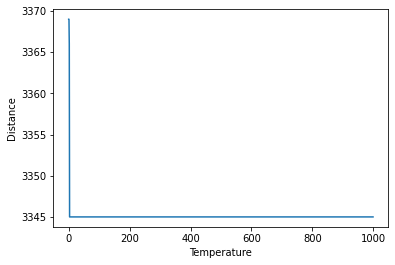

In [281]:
# explore temperature vs algorithm iteration for simulated annealing
from matplotlib import pyplot


print(len(i_tab))
print(len(T_tab))
print(len(distance_tab))

# plot T_tab vs distance_tab
pyplot.plot(distance_tab)


pyplot.xlabel('Temperature')
pyplot.ylabel('Distance')
pyplot.show()